In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the dataset

In [2]:
# Import raw data
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

In [3]:
# Convert CSV to pandas
mouse = pd.read_csv(mouse_path)
study = pd.read_csv(study_path)

In [4]:
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mouse.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [7]:
study.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [8]:
mouse = mouse.rename(columns={"Mouse ID":"mouse_id", "Drug Regimen":"drug_regimen","Sex":"sex", "Age_months":"age_months", "Weight (g)":"weight"})


In [9]:
mouse.columns

Index(['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight'], dtype='object')

In [10]:
mouse.head()

,mouse_id,drug_regimen,sex,age_months,weight
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [11]:
study = study.rename(columns={"Mouse ID":"mouse_id", "Timepoint":"timepoint","Tumor Volume (mm3)":"ttv", "Age_months":"age_months", "Metastatic Sites":"site"})

In [12]:
study.head()

,mouse_id,timepoint,ttv,site
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mouse_id   1893 non-null   object 
 1   timepoint  1893 non-null   int64  
 2   ttv        1893 non-null   float64
 3   site       1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [14]:
mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mouse_id      249 non-null    object
 1   drug_regimen  249 non-null    object
 2   sex           249 non-null    object
 3   age_months    249 non-null    int64 
 4   weight        249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [15]:
# Create a merged df
df = pd.merge(study, mouse, on="mouse_id", how="left")

In [16]:
df.head()

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      1893 non-null   object 
 1   timepoint     1893 non-null   int64  
 2   ttv           1893 non-null   float64
 3   site          1893 non-null   int64  
 4   drug_regimen  1893 non-null   object 
 5   sex           1893 non-null   object 
 6   age_months    1893 non-null   int64  
 7   weight        1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [18]:
df.shape

(1893, 8)

In [19]:
df.count()

mouse_id        1893
timepoint       1893
ttv             1893
site            1893
drug_regimen    1893
sex             1893
age_months      1893
weight          1893
dtype: int64

In [20]:
df.value_counts()

mouse_id  timepoint  ttv        site  drug_regimen  sex     age_months  weight
g989      0          45.000000  0     Propriva      Female  21          26        2
a203      0          45.000000  0     Infubinol     Female  20          23        1
q597      40         44.471821  2     Ramicane      Male    20          25        1
q633      10         49.001866  0     Zoniferol     Male    12          25        1
          5          47.183802  0     Zoniferol     Male    12          25        1
                                                                                 ..
i177      45         33.562402  3     Ramicane      Male    10          18        1
          40         35.557933  2     Ramicane      Male    10          18        1
          35         35.152166  1     Ramicane      Male    10          18        1
          30         34.711473  1     Ramicane      Male    10          18        1
z969      45         73.867845  4     Naftisol      Male    9           30       

In [21]:
# Check the number of unique mouse
df.mouse_id.nunique()

249

In [22]:
df.loc[df.duplicated(), :]

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
137,g989,0,45.0,0,Propriva,Female,21,26


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["mouse_id", "timepoint"]).size().sort_values(ascending=False)

mouse_id  timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [24]:
 # Optional: Get all the data for the duplicate mouse ID. 
mask = df.mouse_id == "g989"
df.loc[mask]

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = df.mouse_id != "g989"

df2 = df.loc[mask2].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      1880 non-null   object 
 1   timepoint     1880 non-null   int64  
 2   ttv           1880 non-null   float64
 3   site          1880 non-null   int64  
 4   drug_regimen  1880 non-null   object 
 5   sex           1880 non-null   object 
 6   age_months    1880 non-null   int64  
 7   weight        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [26]:
# Check the number of unique mouse of the original dataset
df.mouse_id.nunique()

249

In [27]:
# Check the number of unique mouse of the new dataset
df2.mouse_id.nunique()

248

# Summary Statistics

In [28]:
df2.describe()

,timepoint,ttv,site,age_months,weight
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      1880 non-null   object 
 1   timepoint     1880 non-null   int64  
 2   ttv           1880 non-null   float64
 3   site          1880 non-null   int64  
 4   drug_regimen  1880 non-null   object 
 5   sex           1880 non-null   object 
 6   age_months    1880 non-null   int64  
 7   weight        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [30]:
df2.head()

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of 
# each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [32]:
df2["drug_regimen"].nunique()

10

In [33]:
df2 

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
summ = pd.DataFrame()
summ["Mean"] = df2.groupby("drug_regimen")["ttv"].mean()
summ["Median"] = df2.groupby("drug_regimen")["ttv"].median()
summ["Variance"] = df2.groupby("drug_regimen")["ttv"].var()
summ["Standard Deviation"] = df2.groupby("drug_regimen")["ttv"].std()
summ["SEM"] = df2.groupby("drug_regimen")["ttv"].sem()


In [35]:
summ

,Mean,Median,Variance,Standard Deviation,SEM
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
summ.columns

Index(['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM'], dtype='object')

In [37]:
summ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Capomulin to Zoniferol
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                10 non-null     float64
 1   Median              10 non-null     float64
 2   Variance            10 non-null     float64
 3   Standard Deviation  10 non-null     float64
 4   SEM                 10 non-null     float64
dtypes: float64(5)
memory usage: 480.0+ bytes


In [38]:
summ.describe()

,Mean,Median,Variance,Standard Deviation,SEM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.975982,49.902123,47.858440,6.821103,0.502785
std,5.621289,4.705415,16.008423,1.216096,0.103473
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.388490,50.778739,40.249804,6.342952,0.475424
50%,53.060651,51.819532,46.192684,6.794337,0.530365
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


In [39]:
summ

,Mean,Median,Variance,Standard Deviation,SEM
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [41]:
summ2 = df2.groupby("drug_regimen").agg({"ttv": ["mean", "median", "var", "std", "sem"]})

In [42]:
summ2

ttv                                          
                   mean     median        var       std       sem
drug_regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [43]:
df.head()

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
df.groupby("drug_regimen").size()

drug_regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [45]:
summ3 = df["drug_regimen"].value_counts().reset_index()
summ3.columns = ["Drug","Count"]

In [46]:
summ3

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.

<AxesSubplot:title={'center':'Total Number of Timepoints'}, xlabel='Type of Drug', ylabel='# of Timepoints'>

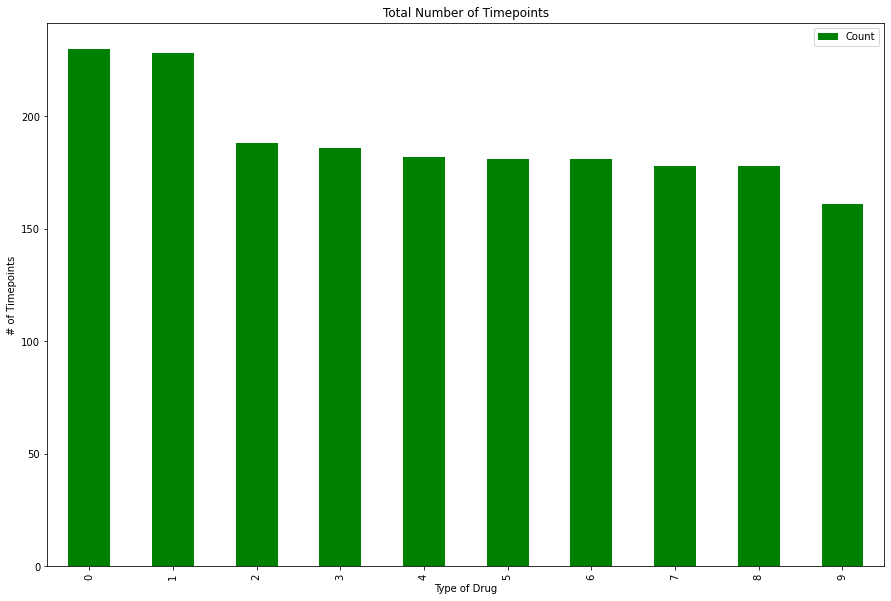

In [48]:
# Configure plot and ticks
summ3.plot.bar(xlabel="Type of Drug", ylabel="# of Timepoints", title="Total Number of Timepoints", figsize=(15, 10), color='g')

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using pyplot.

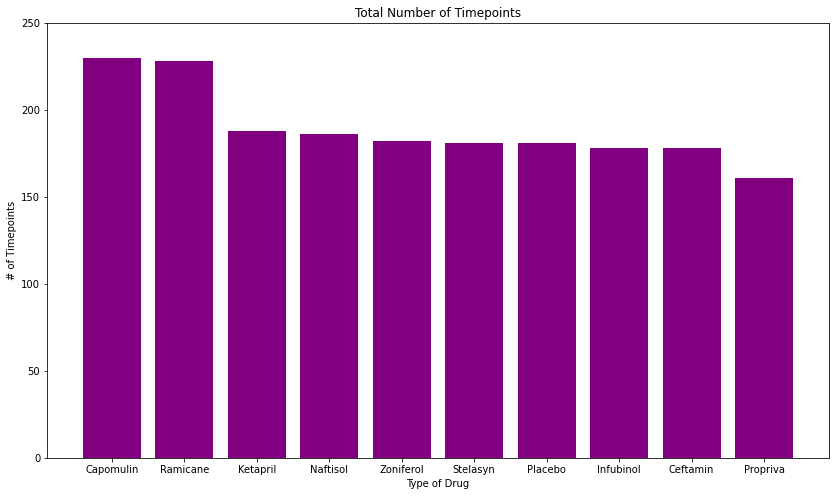

In [50]:
plt.figure(figsize=(14,8))
plt.bar(summ3.Drug, summ3.Count, color="purple")
plt.ylim(0, 250)
plt.title("Total Number of Timepoints")
plt.xlabel("Type of Drug")
plt.ylabel("# of Timepoints")
plt.show()

In [51]:
summ4 = df["sex"].value_counts().reset_index()
summ4.columns = ["Sex","Count"]
summ4

,Sex,Count
0,Male,958
1,Female,935


In [52]:
 # Generate a pie plot showing the distribution of female versus male mice using Pandas

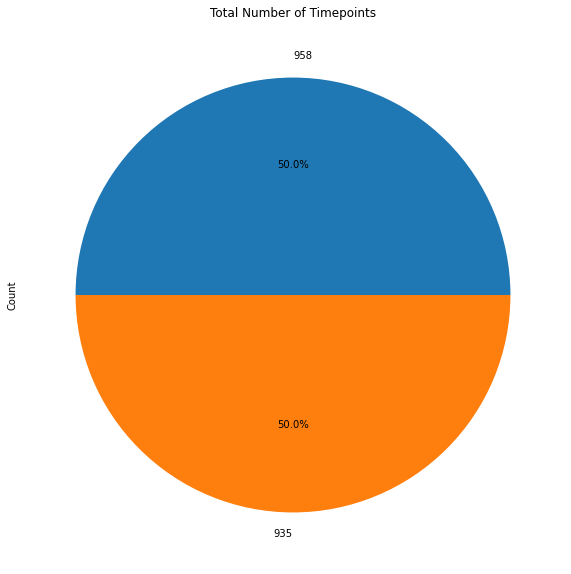

In [53]:
summ4.Count.value_counts().plot(kind="pie", figsize=(15, 10), title="Total Number of Timepoints", autopct="%1.1f%%") 
plt.show()

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

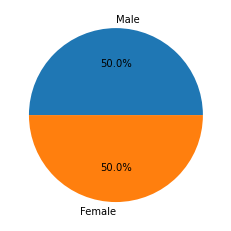

In [55]:
plt.pie(summ4.Count.value_counts(), labels=summ4.Sex.values, autopct="%1.1f%%")
plt.show()

# Quartiles, Outliers and Boxplots

In [56]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      1880 non-null   object 
 1   timepoint     1880 non-null   int64  
 2   ttv           1880 non-null   float64
 3   site          1880 non-null   int64  
 4   drug_regimen  1880 non-null   object 
 5   sex           1880 non-null   object 
 6   age_months    1880 non-null   int64  
 7   weight        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [57]:
df3.head()

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_ttv = df3.groupby(["mouse_id"])['timepoint'].max().reset_index()
final_ttv

,mouse_id,timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [59]:
df3 = final_ttv.merge(df3,on=["mouse_id",'timepoint'],how="left")
df3

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [60]:
# I received help from Alexander when doing this step.
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# List for ttv data 
ttv_list = []

# IQR to check for outliers 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_ttv = df3.loc[df3["drug_regimen"] == drug, 'ttv']
    
    # add subset 
    ttv_list.append(final_ttv)
    
    # Determine outliers using upper and lower bounds
    quartile = final_ttv.quantile([.25,.5,.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    iqr = upperq-lowerq
    lower_bnd = lowerq - (1.5*iqr)
    upper_bnd = upperq + (1.5*iqr)
    outlier = final_ttv.loc[(final_ttv < lower_bnd) | (final_ttv > upper_bnd)]
    print(f"{drug}'s potential outlier: {outlier}")

Capomulin's potential outlier: Series([], Name: ttv, dtype: float64)
Ramicane's potential outlier: Series([], Name: ttv, dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: ttv, dtype: float64
Ceftamin's potential outlier: Series([], Name: ttv, dtype: float64)


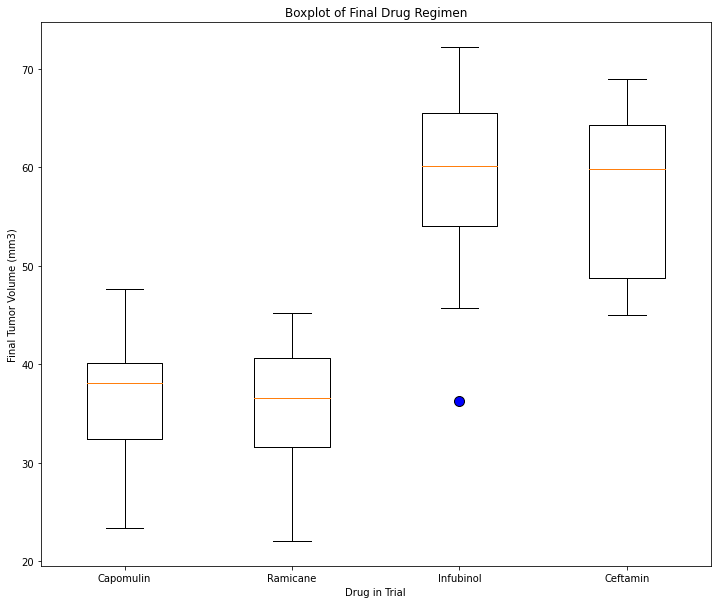

In [61]:
# box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(12, 10))
median = dict(markerfacecolor='blue',markersize=10)
plt.boxplot(ttv_list, labels = regimen, flierprops=median)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Drug in Trial")
plt.title("Boxplot of Final Drug Regimen")
plt.show()

## Line and Scatter-Plots

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mouse_id      248 non-null    object 
 1   timepoint     248 non-null    int64  
 2   ttv           248 non-null    float64
 3   site          248 non-null    int64  
 4   drug_regimen  248 non-null    object 
 5   sex           248 non-null    object 
 6   age_months    248 non-null    int64  
 7   weight        248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.4+ KB


In [63]:
df2.head(50)

,mouse_id,timepoint,ttv,site,drug_regimen,sex,age_months,weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [64]:
df3.columns

Index(['mouse_id', 'timepoint', 'ttv', 'site', 'drug_regimen', 'sex',
       'age_months', 'weight'],
      dtype='object')

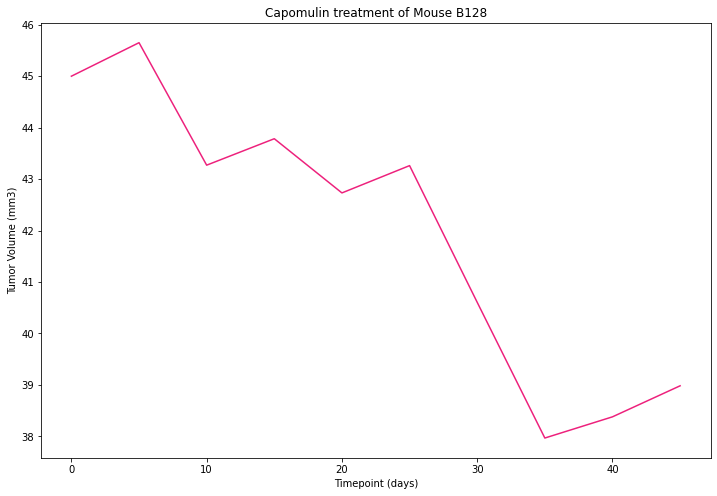

In [65]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
capomulin_data = df2.loc[df2['drug_regimen'] == "Capomulin"]
mouse_capomulin = capomulin_data.loc[capomulin_data['mouse_id']== 'b128']

plt.figure(figsize=(12, 8))
plt.plot(mouse_capomulin['timepoint'],mouse_capomulin['ttv'], color="#ED217C")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse B128')
plt.show()

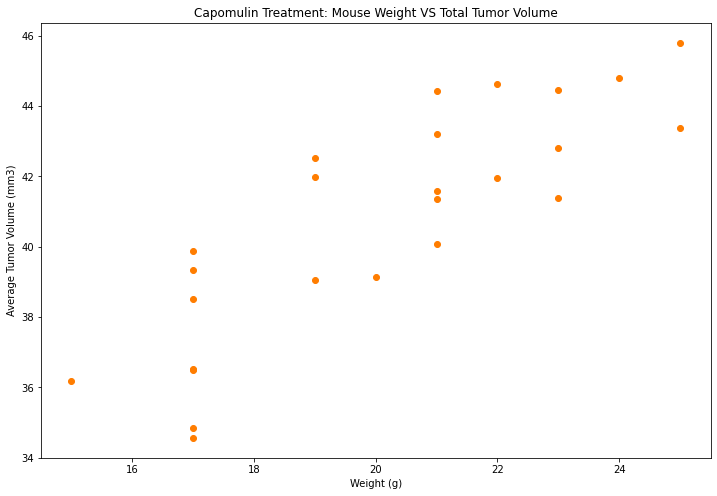

In [66]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
capomulin_data = df2.loc[df2['drug_regimen'] == "Capomulin"]
capomulin_weight = capomulin_data.groupby(['mouse_id']).mean()

plt.figure(figsize=(12, 8))
plt.scatter(capomulin_weight['weight'],capomulin_weight['ttv'], color='#FF7D00')
plt.title("Capomulin Treatment: Mouse Weight VS Total Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Regression and Correlation

In [67]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 

corr=round(st.pearsonr(capomulin_weight['weight'],capomulin_weight['ttv'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")



The correlation between mouse weight and the average tumor volume is 0.84


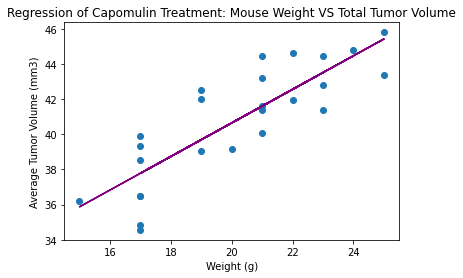

In [68]:
# Plot the linear regression model on top of the previous scatter plot.
model = st.linregress(capomulin_weight['weight'],capomulin_weight['ttv'])
y_values = capomulin_weight['weight']*model[0]+model[1]
plt.scatter(capomulin_weight['weight'],capomulin_weight['ttv'])
plt.title("Regression of Capomulin Treatment: Mouse Weight VS Total Tumor Volume")
plt.plot(capomulin_weight['weight'],y_values,color="purple")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()